<a href="https://colab.research.google.com/github/arad4228/BigData_and_A.I/blob/main/%EC%9D%B8%EA%B3%B5%EC%A7%80%EB%8A%A5(4%EC%9B%94_12%EC%9D%BC_%EC%8B%A4%EC%8A%B5).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 4월 12일 SVM 실습


In [1]:
import numpy as np
import pandas as pd
from google.colab import drive
drive.mount('/smuai')
from google.colab import files
files.upload()

Mounted at /smuai


Saving svm02.csv to svm02.csv


{'svm02.csv': b'x1,x2,y\r\n1,1,-1\r\n2,1,-1\r\n1,2,-1\r\n3,3,1\r\n3,4,1\r\n4,3,1'}

In [22]:
svm01 = pd.read_csv("svm02.csv")
x1 = np.array(svm01['x1'])
x2 = np.array(svm01['x2'])
y = np.array(svm01['y'])
m = len(x1)
print(svm01)
print(m)

   x1  x2  y
0   1   1 -1
1   2   1 -1
2   1   2 -1
3   3   3  1
4   3   4  1
5   4   3  1
6


In [23]:
w1 = -np.multiply(x1,y) # from dL/dt1 = 0
w2 = -np.multiply(x2,y) # from dL/dt2 = 0
print(w1)
print(w2)

[ 1  2  1 -3 -3 -4]
[ 1  1  2 -3 -4 -3]


In [24]:
lamb_mat = []
for i in range(m):
  lamb_mat.append(-np.multiply(w1[i],w1) - np.multiply(w2[i],w2))
lamb_mat.append([1,1,1,-1,-1,-1])

print(lamb_mat[0])
print(lamb_mat[1])
print(lamb_mat[2])
print(lamb_mat[3])
print(lamb_mat[4])
print(lamb_mat[5])
print(lamb_mat[6])

[-2 -3 -3  6  7  7]
[-3 -5 -4  9 10 11]
[-3 -4 -5  9 11 10]
[  6   9   9 -18 -21 -21]
[  7  10  11 -21 -25 -24]
[  7  11  10 -21 -24 -25]
[1, 1, 1, -1, -1, -1]


In [25]:
invlamb = np.linalg.pinv(lamb_mat)

In [26]:
matBB = np.array([1, 1, 1, 1, 1, 1, 0])

In [27]:
lamb = invlamb.dot(matBB)

In [28]:
print(lamb)
print(lamb[0]+lamb[1]+lamb[2]-lamb[3]-lamb[4]-lamb[5])

[-0.01619433 -0.01012146 -0.01012146 -0.00809717 -0.01417004 -0.01417004]
3.4243441415782172e-15


In [43]:
theta1 = w1.dot(lamb)
theta2 = w2.dot(lamb)
norm = np.sqrt(theta1*theta1 + theta2*theta2)
theta1 = theta1 / norm
theta2 = theta2 / norm
print(theta1, theta2)

0.7071067811865489 0.7071067811865464


In [46]:
thetaOn = theta1*2 + theta2*1
print(thetaOn/theta2)
thetaOp = theta1*3 + theta2*3
print(thetaOp/theta2)
theta0 = 0.5*(theta1*5 + theta2*4)
print(theta0/theta2)

3.000000000000007
6.000000000000011
4.500000000000009


In [47]:
x = [0.01 * t for t in range(0, 500)]
y0 = [-1*(theta1/theta2)*n + (theta0/theta2) for n in x]
yp = [-1*(theta1/theta2)*n + (thetaOp/theta2) for n in x]
yn = [-1*(theta1/theta2)*n + (thetaOn/theta2) for n in x]

[-1 -1 -1  1  1  1]


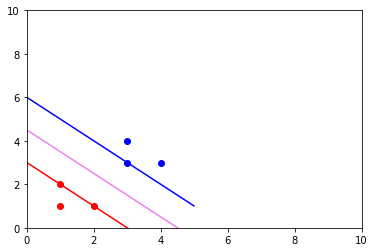

In [48]:
import matplotlib.pyplot as plt
plt.xlim(0,10)
plt.ylim(0,10)
plt.plot(x,y0, color = 'violet', linewidth='1.5')
plt.plot(x,yp, color = 'blue', linewidth='1.5')
plt.plot(x,yn, color = 'red', linewidth='1.5')
print(y)
for i in range(m):
  if(y[i] == -1):
    plt.scatter(x1[i],x2[i], c='r')
  else:
    plt.scatter(x1[i],x2[i],c='b')